In [1]:
import numpy as np
import pandas as pd

In [18]:
# path : lokasi file data berada misal nama datanya adlh anies.csv lokasi ada di D:\dataset maka
# ganti /content/data_set.csv menjadi D:\dataset\anies.csv jika error ganti tanda \ menjadi /
cuit = pd.read_csv('/content/data_set.csv')
cuit

,tweet,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,"Pemimpin Berkwalitas , Amanah, Bersahaja, Bera...",NaN,NaN,Positif
1,Coba tebak siapa anak yang dekat Pak Anies yan...,NaN,NaN,Netral
2,JARNAS ANIES BERAKSI JAWA TIMUR LAUNCHING 1.00...,NaN,NaN,positif
3,Olahraga pak Anies sangat Simpel gak pakai Sel...,NaN,NaN,positif
4,"MESTI DI TIRU, CAWE CAWE DARI RAKYAT UNTUK MEM...",NaN,NaN,positif
...,...,...,...,...
1004,"Rest In Peace \nPartai @Nasdem, pengusung @ani...",NaN,NaN,negatif
1005,Ngakunya Jawa Tulen tapi gak bisa bedain antar...,NaN,NaN,negatif
1006,@DokterTifa @aniesbaswedan Semoga Pak Anies me...,NaN,NaN,netral
1007,@kangdede78 @aniesbaswedan Mna yg ngibul kakek...,NaN,NaN,netral


In [19]:
# acak(shuffle) dataset
cuit= cuit.sample(frac = 1)
cuit

,tweet,Unnamed: 1,Unnamed: 2,Unnamed: 3
430,@democrazymedia Hidup itu perubahan..,NaN,NaN,netral
431,@OposisiCerdas @veramustikaz Anies hebat bange...,NaN,NaN,positif
426,@ch_chotimah2 Korban dari Effeck anies. nggak ...,NaN,NaN,negatif
1006,@DokterTifa @aniesbaswedan Semoga Pak Anies me...,NaN,NaN,netral
486,Haha Surya Paloh Mulai Ngga Waras Berpikir Men...,NaN,NaN,negatif
...,...,...,...,...
579,Responden pendukung Prabowo dan Ganjar paling ...,NaN,NaN,netral
184,Lestari jd cawapres nya anies aja bib nopel,NaN,NaN,negatif
201,Yourth Nasdem Festival Anies Baswedan Bersama ...,NaN,NaN,positif
294,VIRAL.\nTERBONGKAR ADA UPAYA NAGA MERAH INGIN ...,NaN,NaN,negatif


In [20]:
persen = 0.5
persen = int(cuit.shape[0] * persen)
no_label = cuit.iloc[persen:,:].tweet
no_label.shape

(505,)

In [21]:
cuit = cuit.iloc[:persen,:]
cuit.shape

(504, 4)

In [22]:
# hapus kolom ke 1 sampai 2 (kolom 3 tdk termasuk). kolom 1 dan 2 adlh Unnamed: 1 dan Unnamed: 2
cuit.drop(cuit.iloc[:, 1:3],inplace=True, axis=1)
# ganti nama kolom tweet jd cuitan dan kolom Unnamed: 3 jd kelas
cuit.columns = ['cuitan','kelas']
cuit

<ipython-input-22-78b4332abf05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuit.drop(cuit.iloc[:, 1:3],inplace=True, axis=1)


,cuitan,kelas
430,@democrazymedia Hidup itu perubahan..,netral
431,@OposisiCerdas @veramustikaz Anies hebat bange...,positif
426,@ch_chotimah2 Korban dari Effeck anies. nggak ...,negatif
1006,@DokterTifa @aniesbaswedan Semoga Pak Anies me...,netral
486,Haha Surya Paloh Mulai Ngga Waras Berpikir Men...,negatif
...,...,...
518,Anies Baswedan diendors oleh rakyat untuk Capr...,positif
166,Lambat-laun dukungan ke Anies Baswedan makin m...,positif
247,@narkosun Jangan cuma...\nBisanya ngurus Anies...,negatif
472,@VIVAcoid Jadi ingat dulu menjelang pilkada DK...,positif


In [23]:
import re
def cleaningcuit(cuit):
  # hapus tag ke seseorang. misal @anies, @jokowi, @Nasdem akan dihapus
  cuit = re.sub(r'@[A-Za-a0-9]+',' ',cuit)
  # hapus hash. misalnya #anies, #ganjar, #gabener akan dihapus
  cuit = re.sub(r'#[A-Za-z0-9]+',' ',cuit)
  # hapus link. misalnya https://www.google.com/ akan dihapus
  cuit = re.sub(r"http\S+",' ',cuit)
  # hapus angka. misal ada angka 2024 akan dihapus
  cuit = re.sub(r'[0-9]+',' ',cuit)
  # hapus tanda baca. misal ada tanda ? titik koma dll akan dihapus
  cuit = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", cuit)
  # hapus spasi yg banyak. misalnya spasinya 2 kali maka akan dihapus
  cuit = cuit.strip(' ')
  return cuit
cuit['Cleaning']= cuit['cuitan'].apply(cleaningcuit)

def clearEmoji(cuit):
  # decode emoji, misalnya emoji jempol akan di decode menjd suatu karakter ascii
    return cuit.encode('ascii', 'ignore').decode('ascii')
cuit['HapusEmoji']= cuit['Cleaning'].apply(clearEmoji)

def replaceTOM(cuit):
  # hapus emoji
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', cuit)
cuit['3/Lebih']= cuit['HapusEmoji'].apply(replaceTOM)

def casefoldingText(cuit):
  # case fold, ubah semua kata menjad lower case
  cuit = cuit.lower()
  return cuit
cuit['CaseFolding']= cuit['3/Lebih'].apply(casefoldingText)

<ipython-input-23-5f9b23d0f80b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuit['Cleaning']= cuit['cuitan'].apply(cleaningcuit)
<ipython-input-23-5f9b23d0f80b>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuit['HapusEmoji']= cuit['Cleaning'].apply(clearEmoji)
<ipython-input-23-5f9b23d0f80b>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [24]:
cuit

,cuitan,kelas,Cleaning,HapusEmoji,3/Lebih,CaseFolding
430,@democrazymedia Hidup itu perubahan..,netral,democrazymedia Hidup itu perubahan,democrazymedia Hidup itu perubahan,democrazymedia Hidup itu perubahan,democrazymedia hidup itu perubahan
431,@OposisiCerdas @veramustikaz Anies hebat bange...,positif,posisiCerdas veramustikaz Anies hebat banget ...,posisiCerdas veramustikaz Anies hebat banget ...,posisiCerdas veramustikaz Anies hebat banget ...,posisicerdas veramustikaz anies hebat banget ...
426,@ch_chotimah2 Korban dari Effeck anies. nggak ...,negatif,ch chotimah Korban dari Effeck anies nggak s...,ch chotimah Korban dari Effeck anies nggak s...,ch chotimah Korban dari Effeck anies nggak s...,ch chotimah korban dari effeck anies nggak s...
1006,@DokterTifa @aniesbaswedan Semoga Pak Anies me...,netral,okterTifa niesbaswedan Semoga Pak Anies memil...,okterTifa niesbaswedan Semoga Pak Anies memil...,okterTifa niesbaswedan Semoga Pak Anies memil...,oktertifa niesbaswedan semoga pak anies memil...
486,Haha Surya Paloh Mulai Ngga Waras Berpikir Men...,negatif,Haha Surya Paloh Mulai Ngga Waras Berpikir Men...,Haha Surya Paloh Mulai Ngga Waras Berpikir Men...,Haha Surya Paloh Mulai Ngga Waras Berpikir Men...,haha surya paloh mulai ngga waras berpikir men...
...,...,...,...,...,...,...
518,Anies Baswedan diendors oleh rakyat untuk Capr...,positif,Anies Baswedan diendors oleh rakyat untuk Capres,Anies Baswedan diendors oleh rakyat untuk Capres,Anies Baswedan diendors oleh rakyat untuk Capres,anies baswedan diendors oleh rakyat untuk capres
166,Lambat-laun dukungan ke Anies Baswedan makin m...,positif,Lambat laun dukungan ke Anies Baswedan makin m...,Lambat laun dukungan ke Anies Baswedan makin m...,Lambat laun dukungan ke Anies Baswedan makin m...,lambat laun dukungan ke anies baswedan makin m...
247,@narkosun Jangan cuma...\nBisanya ngurus Anies...,negatif,narkosun Jangan cuma \nBisanya ngurus Anies ...,narkosun Jangan cuma \nBisanya ngurus Anies ...,narkosun Jangan cuma \nBisanya ngurus Anies s...,narkosun jangan cuma \nbisanya ngurus anies s...
472,@VIVAcoid Jadi ingat dulu menjelang pilkada DK...,positif,coid Jadi ingat dulu menjelang pilkada DKI si...,coid Jadi ingat dulu menjelang pilkada DKI si...,coid Jadi ingat dulu menjelang pilkada DKI si...,coid jadi ingat dulu menjelang pilkada dki si...


In [25]:
# cek kolom kelas isinya apa saja
cuit['kelas'].unique()

array(['netral', 'positif', 'negatif', 'Positif'], dtype=object)

In [26]:
# pada kolom kelas, ubah semua kata menjadi huruf kecil semua (case folding ke lower case)
cuit['kelas']=cuit['kelas'].apply(casefoldingText)

<ipython-input-26-cccff4c66938>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuit['kelas']=cuit['kelas'].apply(casefoldingText)


In [27]:
# cek saja biar yakin bahwa kolom kelas semua kata sudah huruf kecil semua
cuit['kelas'].unique()

array(['netral', 'positif', 'negatif'], dtype=object)

In [28]:
# SEMUA KODE INI UNTUK MENGUBAH kelas setiap cuitan (positif, negatif, dan netral) menjadi angka (positif=2, negatif=0, dan netral=1)
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
cuit['target']= label_encoder.fit_transform(cuit['kelas'])
cuit

<ipython-input-28-49532717c651>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cuit['target']= label_encoder.fit_transform(cuit['kelas'])


,cuitan,kelas,Cleaning,HapusEmoji,3/Lebih,CaseFolding,target
430,@democrazymedia Hidup itu perubahan..,netral,democrazymedia Hidup itu perubahan,democrazymedia Hidup itu perubahan,democrazymedia Hidup itu perubahan,democrazymedia hidup itu perubahan,1
431,@OposisiCerdas @veramustikaz Anies hebat bange...,positif,posisiCerdas veramustikaz Anies hebat banget ...,posisiCerdas veramustikaz Anies hebat banget ...,posisiCerdas veramustikaz Anies hebat banget ...,posisicerdas veramustikaz anies hebat banget ...,2
426,@ch_chotimah2 Korban dari Effeck anies. nggak ...,negatif,ch chotimah Korban dari Effeck anies nggak s...,ch chotimah Korban dari Effeck anies nggak s...,ch chotimah Korban dari Effeck anies nggak s...,ch chotimah korban dari effeck anies nggak s...,0
1006,@DokterTifa @aniesbaswedan Semoga Pak Anies me...,netral,okterTifa niesbaswedan Semoga Pak Anies memil...,okterTifa niesbaswedan Semoga Pak Anies memil...,okterTifa niesbaswedan Semoga Pak Anies memil...,oktertifa niesbaswedan semoga pak anies memil...,1
486,Haha Surya Paloh Mulai Ngga Waras Berpikir Men...,negatif,Haha Surya Paloh Mulai Ngga Waras Berpikir Men...,Haha Surya Paloh Mulai Ngga Waras Berpikir Men...,Haha Surya Paloh Mulai Ngga Waras Berpikir Men...,haha surya paloh mulai ngga waras berpikir men...,0
...,...,...,...,...,...,...,...
518,Anies Baswedan diendors oleh rakyat untuk Capr...,positif,Anies Baswedan diendors oleh rakyat untuk Capres,Anies Baswedan diendors oleh rakyat untuk Capres,Anies Baswedan diendors oleh rakyat untuk Capres,anies baswedan diendors oleh rakyat untuk capres,2
166,Lambat-laun dukungan ke Anies Baswedan makin m...,positif,Lambat laun dukungan ke Anies Baswedan makin m...,Lambat laun dukungan ke Anies Baswedan makin m...,Lambat laun dukungan ke Anies Baswedan makin m...,lambat laun dukungan ke anies baswedan makin m...,2
247,@narkosun Jangan cuma...\nBisanya ngurus Anies...,negatif,narkosun Jangan cuma \nBisanya ngurus Anies ...,narkosun Jangan cuma \nBisanya ngurus Anies ...,narkosun Jangan cuma \nBisanya ngurus Anies s...,narkosun jangan cuma \nbisanya ngurus anies s...,0
472,@VIVAcoid Jadi ingat dulu menjelang pilkada DK...,positif,coid Jadi ingat dulu menjelang pilkada DKI si...,coid Jadi ingat dulu menjelang pilkada DKI si...,coid Jadi ingat dulu menjelang pilkada DKI si...,coid jadi ingat dulu menjelang pilkada dki si...,2


<Axes: ylabel='kelas'>

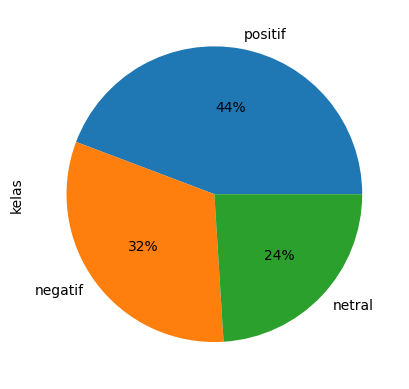

In [29]:
# lihat persentasi cuitan yg positif, negatif, dan netral
cuit.kelas.value_counts().plot(kind='pie', autopct='%1.0f%%')

feature extraction

In [30]:
# daftar kata stop word bahasa indonesia
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
indo = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# word cloud

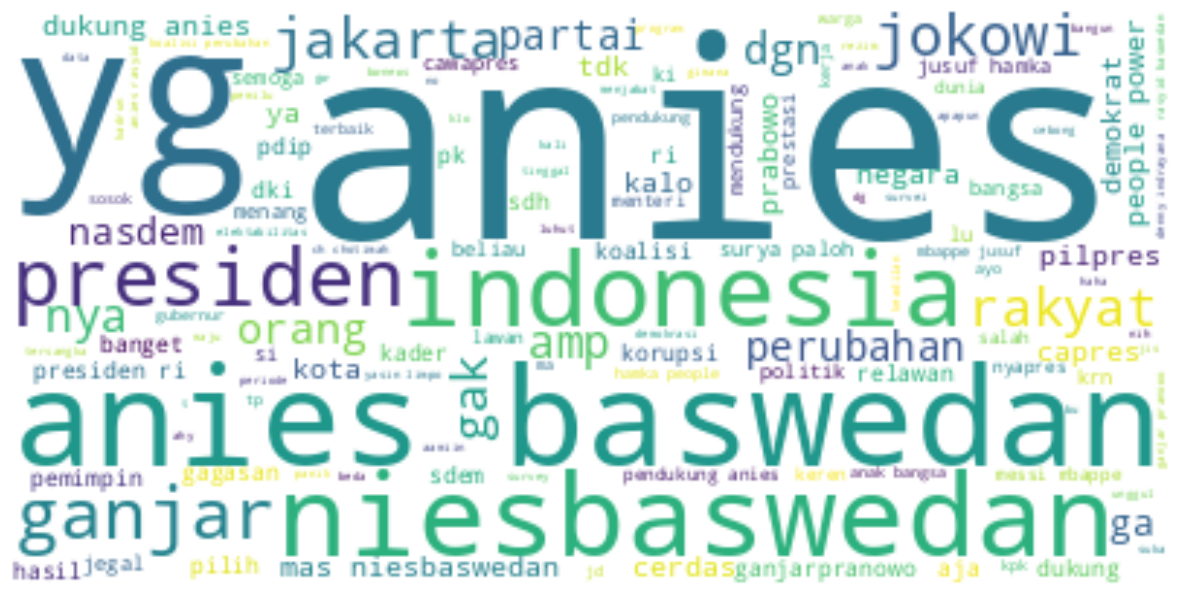

In [34]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
text = " ".join(i for i in cuit.CaseFolding)
stopwords = set(indo)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# akhir word cloud

In [38]:
# from sklearn.feature_extraction.text import CountVectorizer
# # hapus stop word dan ubah semua cuitan jd vektor
# tfidf_vectorizer = CountVectorizer(max_df=0.90, max_features=1000, stop_words=indo)
# # terapkan tfidf ke data kita
# tfidf = tfidf_vectorizer.fit_transform(cuit['CaseFolding'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


# tfidf

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, max_features=1000, stop_words=indo)
#vec = CountVectorizer(decode_error="replace")
tfidf = tfidf_vectorizer.fit_transform(cuit['CaseFolding'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [42]:
features_array = tfidf.toarray()

print(features_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [43]:
words_set = tfidf_vectorizer.get_feature_names_out()

print(words_set)

['aamiin' 'acara' 'aceh' 'adil' 'adu' 'agung' 'ah' 'ahok' 'ahy' 'aja'
 'akal' 'akbar' 'aksi' 'aktor' 'akun' 'akur' 'al' 'ala' 'alasan' 'aldi'
 'alhamdulillah' 'ali' 'allah' 'allahu' 'allahumma' 'alumni' 'aman'
 'amanah' 'amp' 'an' 'anak' 'anang' 'and' 'andai' 'aneh' 'anggaran'
 'anggota' 'anies' 'anis' 'anteng' 'anti' 'apapun' 'apri' 'arda' 'ariani'
 'asing' 'atu' 'audit' 'aurel' 'ayo' 'baca' 'bacawapres' 'back' 'bagus'
 'baha' 'bahas' 'bahasa' 'bahaya' 'banding' 'bandingke' 'bang' 'banget'
 'bangsa' 'bangsat' 'bangun' 'bangunx' 'banjir' 'baper' 'bareng' 'basah'
 'baswedan' 'batas' 'bawaslu' 'bayak' 'bayar' 'bdulrachimmks' 'beda'
 'bedain' 'bela' 'belagu' 'beliau' 'benci' 'bener' 'beneran' 'berani'
 'berbeda' 'bercanda' 'berdasarkan' 'berdemokrasi' 'berdiskusi' 'berhenti'
 'berita' 'berkolaborasi' 'berkomunikasi' 'berkuasa' 'berpendidikan'
 'berpikir' 'berprestasi' 'bertemu' 'berubah' 'berulah' 'berusaha'
 'betapa' 'bewok' 'bhw' 'biar' 'biarkan' 'biaya' 'biayai' 'bicara'
 'bidang' 'bik

# akhir tfidf

In [44]:
from sklearn.model_selection import train_test_split
# bagi 2 data kita dimana 0.2 atau 20% dari data kita sebagai data test (test_size=0.2) dan sisanya (0.8 atau 80%) sebagai data training
X_train, X_test, y_train, y_test = train_test_split(tfidf, cuit['target'], test_size=0.2, random_state=0)

In [45]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import mean_squared_error,mean_absolute_error, make_scorer,classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

# buat model svm dg kernel rbf (kernel='rbf')
svc = svm.SVC(kernel='rbf', C=1, probability=True).fit(X_train, y_train)

# prediksi data testing
prediction = svc.predict_proba(X_test)
prediction_int = prediction[:,1] >= 0.3

F1_Score = f1_score(y_test, prediction_int, average='micro') #menghitung f1-score
print('Precision score: ', precision_score(y_test, prediction_int, average='micro')) #menghitung precision score
print('Accuracy Score: ', accuracy_score(y_test, prediction_int)) #menghitung accuracy score
print(f'F1_Score: {F1_Score}')

Precision score:  0.297029702970297
Accuracy Score:  0.297029702970297
F1_Score: 0.297029702970297


evaluasi

In [46]:
MODEL_ID = []
Accuracy = []
LOG_CV_ERR = []
F1Score = []
def calculate_log_cv_error(logmodel,X_train,y_train):
  # lakukan cross validasi score (acak data)
    ms_errors= cross_val_score(logmodel, X_train, y_train, cv=5, scoring = make_scorer(mean_squared_error))
    # hitung means rms error
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()
    return mean_rms_error

In [47]:
def evaluate_model(logmodel,X_train,X_test,y_train,y_test,predictions):
  # hitung cross validasi score dg cara memanggil fungsi diatas yg telah kita buat
    log_cv_error = calculate_log_cv_error(logmodel,X_train,y_train)
    # lihat hasil laporan klasifikasi
    print(f'\nClassification Report:\n{classification_report(y_test,predictions)}')
    print('')
    # lihat confusion matrix
    print(f'\nConfusion Matrix:\n{confusion_matrix(y_test,predictions)}')
    print('')
    # lihat akurasi
    print (f'\nAccuracy Score:  {accuracy_score(y_test,predictions)}')
    # lihat error untuk cross validasi (acak data)
    print("Cross Validation Error: ",log_cv_error)
    # logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test), multi_class='ovo',average='micro')
    # fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
    # LOG_CV_ERR.append(log_cv_error)
    # plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    # plt.plot([0, 1], [0, 1],'r--')
    # plt.xlim([0.0, 1.0])
    # plt.ylim([0.0, 1.05])
    # plt.xlabel('False Positive Rate')
    # plt.ylabel('True Positive Rate')
    # plt.title('Receiver Operating Characteristic')
    # plt.legend(loc="lower right")
    # plt.show()

In [48]:
# lihat dan hitung evaluasi model svm menggunakan fungsi yg telah kita buat
evaluate_model(svc,X_train,X_test,y_train,y_test,prediction_int)
MODEL_ID.append('Support Vector Classifier')
# hitung akurasi
Accuracy.append(accuracy_score(y_test, prediction_int))
# hitung f1 score
F1Score.append(f1_score(y_test, prediction_int, average='micro', labels=np.unique(prediction_int)))


Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.70      0.39        27
           1       0.37      0.42      0.39        26
           2       0.00      0.00      0.00        48

    accuracy                           0.30       101
   macro avg       0.21      0.38      0.26       101
weighted avg       0.17      0.30      0.20       101



Confusion Matrix:
[[19  8  0]
 [15 11  0]
 [37 11  0]]


Accuracy Score:  0.297029702970297
Cross Validation Error:  1.0492236409740308


# data evaluasi

## preprocessing data evaluasi

In [49]:
import re
def cleaningcuit(cuit):
  # hapus tag ke seseorang. misal @anies, @jokowi, @Nasdem akan dihapus
  cuit = re.sub(r'@[A-Za-a0-9]+',' ',cuit)
  # hapus hash. misalnya #anies, #ganjar, #gabener akan dihapus
  cuit = re.sub(r'#[A-Za-z0-9]+',' ',cuit)
  # hapus link. misalnya https://www.google.com/ akan dihapus
  cuit = re.sub(r"http\S+",' ',cuit)
  # hapus angka. misal ada angka 2024 akan dihapus
  cuit = re.sub(r'[0-9]+',' ',cuit)
  # hapus tanda baca. misal ada tanda ? titik koma dll akan dihapus
  cuit = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_]", " ", cuit)
  # hapus spasi yg banyak. misalnya spasinya 2 kali maka akan dihapus
  cuit = cuit.strip(' ')
  return cuit
no_label= no_label.apply(cleaningcuit)

def clearEmoji(cuit):
  # decode emoji, misalnya emoji jempol akan di decode menjd suatu karakter ascii
    return cuit.encode('ascii', 'ignore').decode('ascii')
no_label= no_label.apply(clearEmoji)

def replaceTOM(cuit):
  # hapus emoji
    pola = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pola.sub(r'\1', cuit)
no_label= no_label.apply(replaceTOM)

def casefoldingText(cuit):
  # case fold, ubah semua kata menjad lower case
  cuit = cuit.lower()
  return cuit
no_label= no_label.apply(casefoldingText)

In [50]:
no_label

606                     waduh  makin gajelas ini orang \n
586                      msaid didu semoga anies presiden
695     pendukung anies sama ganjar saling ribut  ga h...
1000    periode saja mas  niesbaswedan mampu membawa j...
564     kucingantuk knilheihoarmy  yokback  kangdede d...
                              ...                        
579     responden pendukung prabowo dan ganjar paling ...
184           lestari jd cawapres nya anies aja bib nopel
201     yourth nasdem festival anies baswedan bersama ...
294     viral \nterbongkar ada upaya naga merah ingin ...
538     ennysiregar sdem sebegitu takutnya orang orang...
Name: tweet, Length: 505, dtype: object

In [51]:
data_evaluasi = tfidf_vectorizer.transform(no_label)
data_evaluasi

<505x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 3747 stored elements in Compressed Sparse Row format>

In [52]:
features_array = data_evaluasi.toarray()

print(features_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [55]:
hasil_evaluasi = svc.predict(data_evaluasi)
hasil_evaluasi

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 1, 0, 2, 0, 2, 0, 2,
       2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1,
       2, 2, 2, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 2, 2, 2, 2, 1, 0,
       0, 2, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0,

In [57]:
# kembalikan label yg telah di encode dengan LabelEncoder jd semula
label_hasil_evaluasi = label_encoder.inverse_transform(hasil_evaluasi)
label_hasil_evaluasi

array(['negatif', 'positif', 'negatif', 'positif', 'negatif', 'positif',
       'negatif', 'positif', 'negatif', 'negatif', 'positif', 'negatif',
       'positif', 'netral', 'negatif', 'negatif', 'negatif', 'positif',
       'negatif', 'negatif', 'positif', 'negatif', 'positif', 'negatif',
       'positif', 'negatif', 'negatif', 'positif', 'positif', 'negatif',
       'positif', 'positif', 'positif', 'positif', 'netral', 'negatif',
       'negatif', 'netral', 'negatif', 'positif', 'negatif', 'positif',
       'negatif', 'positif', 'positif', 'positif', 'netral', 'positif',
       'positif', 'negatif', 'positif', 'positif', 'positif', 'negatif',
       'negatif', 'positif', 'positif', 'positif', 'negatif', 'positif',
       'positif', 'negatif', 'positif', 'negatif', 'positif', 'negatif',
       'netral', 'positif', 'positif', 'positif', 'positif', 'positif',
       'positif', 'positif', 'positif', 'positif', 'negatif', 'negatif',
       'positif', 'positif', 'positif', 'positif', 'posi

<Axes: >

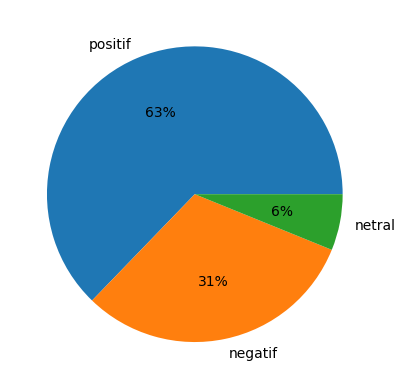

In [64]:
label_hasil_evaluasi = pd.Series(label_hasil_evaluasi)
label_hasil_evaluasi.value_counts().plot(kind='pie', autopct='%1.0f%%')